<a href="https://colab.research.google.com/github/digregorio/Calc_Metricas_de_Avaliacao/blob/main/Calc_Metricas_de_Avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -q tensorflow

In [ ]:
from tensorflow.keras import datasets, layers, models
import keras.api._v2.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

import scikitplot as skplt
import matplotlib.pyplot as plt

In [ ]:
%load_ext tensorboard

In [ ]:
logdir='log'

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1507 - accuracy: 0.9539 - val_loss: 0.0523 - val_accuracy: 0.9824
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.0324 - val_accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0393 - val_accuracy: 0.9863
Epoch 4/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0270 - val_accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0341 - val_accuracy: 0.9898


In [ ]:
y_true=test_labels

y_pred=model.predict(test_images) 
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 6s 19ms/step


In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

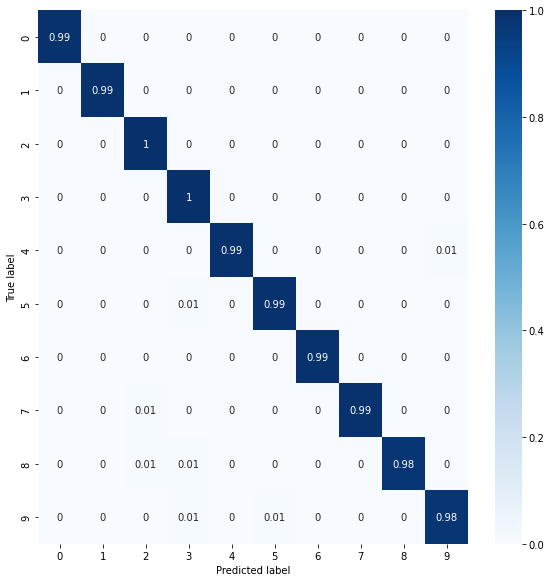

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
vp = (0.99 * 6) + (1 * 2) + (0.98 * 2) # True positives
fn = (0.01 * 6) + (0.02 * 2) # False negatives

fp = 0.01 * 7 # False positives
vn = 90 - fp # True negatives

s = vp / (vp +fn) # Sensitivity

e = vn / (fp + vn) # Specificity

a = (vp + vn) / 100 # Accuracy

p = vp / (vp + fp) # Precision

fs = 2 * ((p * s) / (p + s)) # F-score

0.9914872308462694